PRCP- 1001- RiceLeaf disease

Problem Statement:                                                                                                                                                     
               
          This project focuses on detecting three major rice leaf diseases: Leaf smut, Bacterial leaf Blight, and Brown Spot using machine learning techniques.


Objective:

*Perform a complete data analysis on the given dataset.

*Build a classification model to identify rice leaf diseases.

*Analyze techniques such as data augmentation to improve model performance.

Dataset Overview :

In [1]:
data="C:/Users/prasa/Downloads/datamites projects/datas/PRCP-1001-RiceLeaf/Data"       #dataset path  use / instead of \
classes= ["Leaf Smut", "Brown Spot", "Bacterial Leaf Blight"]

In [2]:
import os
from PIL import Image

In [3]:
class_distribution = {}
for class_name in classes:
        class_path = os.path.join(data, class_name)
        num_images = len(os.listdir(class_path))
        class_distribution[class_name] = num_images

In [4]:
class_distribution

{'Leaf Smut': 39, 'Brown Spot': 40, 'Bacterial Leaf Blight': 40}

Find and Replace Corrupted and Inconsistent Image

In [5]:
corrupted_images = []
inconsistent_resolutions = []
unique_resolutions = set()

for class_name in classes:
    class_path = os.path.join(data, class_name)
    if os.path.exists(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            try:
                with Image.open(image_path) as img:
                    resolution = img.size
                    unique_resolutions.add(resolution)
            except Exception as e:
                corrupted_images.append(image_path)
    
if len(unique_resolutions) > 1:
    inconsistent_resolutions = list(unique_resolutions)

In [6]:
if corrupted_images:
    print("Corrupted Images Found:")
    for img in corrupted_images:
        print(img)
else:
    print("No corrupted images found.")

if inconsistent_resolutions:
    print("\nInconsistent Resolutions Found:")
    for res in inconsistent_resolutions:
        print(res)
else:
    print("All images have consistent resolution.")

No corrupted images found.
All images have consistent resolution.


In [7]:
# Target resolution
target_size = (224, 224)

# Function to resize images with inconsistent resolutions
def resize_images(data_path, classes, target_size):
    for class_name in classes:
        class_path = os.path.join(data_path, class_name)
        if os.path.exists(class_path):
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                try:
                    with Image.open(image_path) as img:
                        if img.size != target_size:
                            # Resize and save the image
                            img_resized = img.resize(target_size)
                            img_resized.save(image_path)
                            print(f"Resized: {image_path}")
                except (IOError, OSError):
                    print(f"Failed to process: {image_path}")

In [8]:
# Call the function to resize images
resize_images(data, classes, target_size)

Exploratory Data Analysis (EDA)

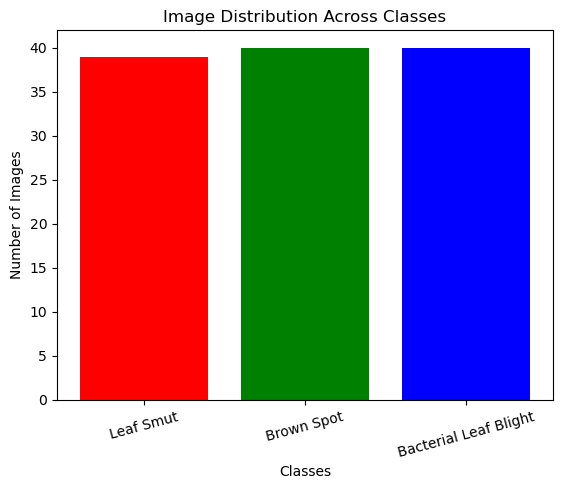

In [9]:
# Visualize the distribution
import matplotlib.pyplot as plt
plt.bar(class_distribution.keys(), class_distribution.values(), color=['red', 'green', 'blue'])
plt.title("Image Distribution Across Classes")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.xticks(rotation=15)
plt.show()

Display Sample Images

In [10]:
def sample_images(data_path, classes, samples_per_class=3):
    plt.figure(figsize=(15, 10))
    for class_idx, class_name in enumerate(classes):
        class_path = os.path.join(data_path, class_name)
        if os.path.exists(class_path):
            images = os.listdir(class_path)[:samples_per_class]  # Get the first few images
            for i, image_name in enumerate(images):
                image_path = os.path.join(class_path, image_name)
                img = Image.open(image_path)
                plt.subplot(len(classes), samples_per_class, class_idx * samples_per_class + i + 1)
                plt.imshow(img)
                plt.title(f"{class_name}", fontsize=10)
                plt.axis("off")
    plt.tight_layout()
    plt.show()

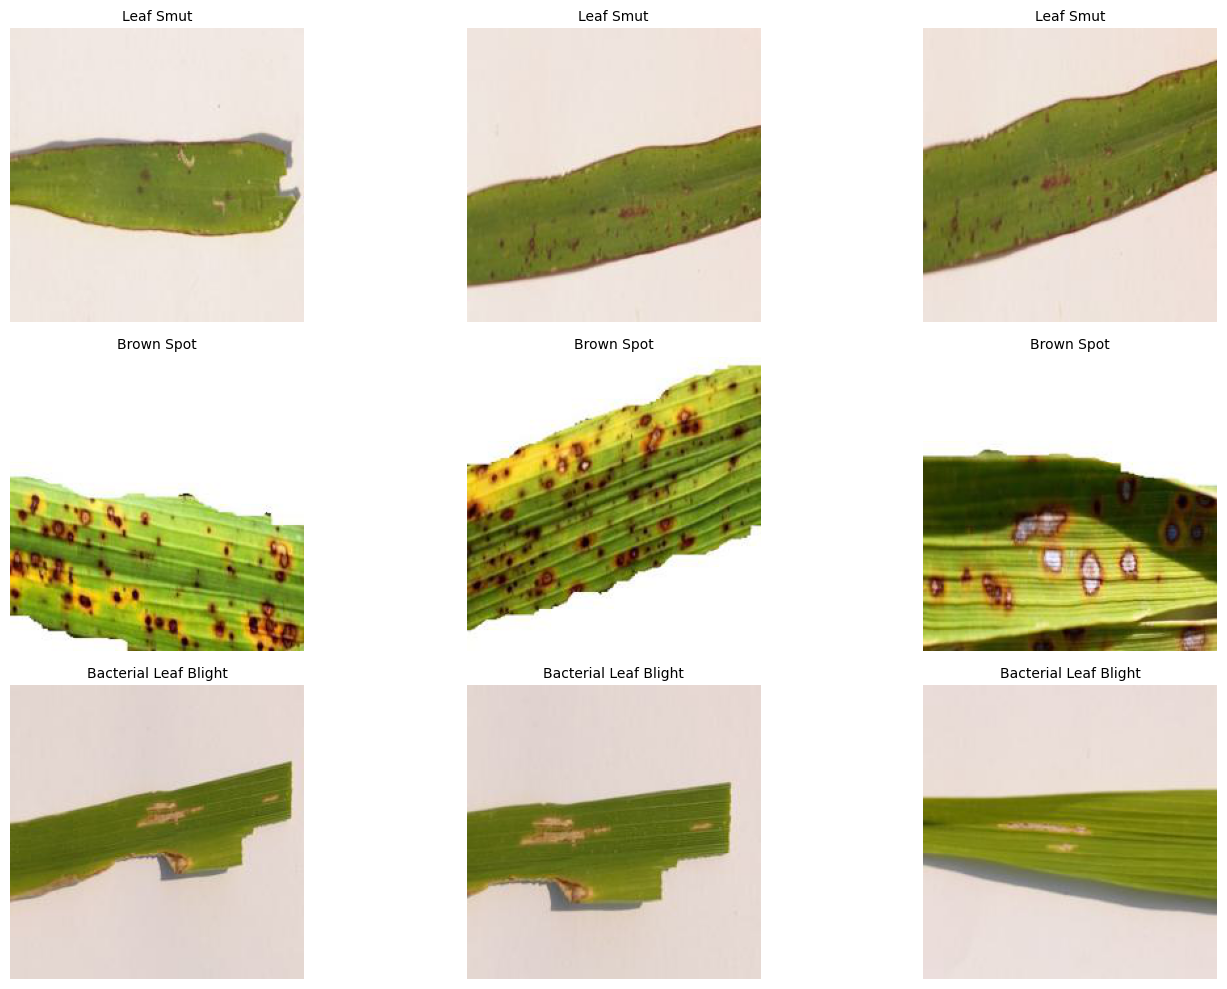

In [11]:
sample_images(data,classes)

Data Augumentation

In [12]:
# Image preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.4,
    height_shift_range=0.3,
    shear_range=0.4,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [13]:
data_generator =datagen.flow_from_directory(
    data,
    target_size=(224,224),  # Resize images to 128x128
    batch_size=64,
    class_mode='categorical'
)

Found 119 images belonging to 3 classes.


Model Development

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16, ResNet50,InceptionV3,MobileNet
from tensorflow.keras.models import Model

In [15]:
def load_images_and_labels(data, image_size):
    images, labels = [], []
    for label, class_name in enumerate(classes):
        class_path = os.path.join(data, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                img = Image.open(img_path).convert('RGB')
                img = img.resize(image_size)
                images.append(np.array(img) / 255.0)
                labels.append(label)
            except Exception as e:
                print(f"Error loading {img_name}: {e}")
    return np.array(images), np.array(labels)

In [16]:
# Load dataset
images,labels = load_images_and_labels(data,(224,224))

In [17]:
# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, stratify=labels, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [18]:
# One-hot encoding for labels
y_train_oh = to_categorical(y_train, num_classes=len(classes))
y_val_oh = to_categorical(y_val, num_classes=len(classes))
y_test_oh = to_categorical(y_test, num_classes=len(classes))

In [19]:
X_train.shape

(83, 224, 224, 3)

In [20]:
X_test.shape

(18, 224, 224, 3)

In [21]:
y_train.shape

(83,)

In [22]:
y_test.shape

(18,)

CNN Basic Model

In [23]:

def cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [24]:
# Train the model
model = cnn_model(X_train[0].shape, len(classes))
history_model = model.fit(X_train, y_train_oh, validation_data=(X_val, y_val_oh), epochs=15, batch_size=16)

c:\Users\prasa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.3641 - loss: 5.4085 - val_accuracy: 0.4444 - val_loss: 1.2250
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.3127 - loss: 1.1462 - val_accuracy: 0.4444 - val_loss: 1.0824
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.4568 - loss: 1.0900 - val_accuracy: 0.3333 - val_loss: 1.2401
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.4055 - loss: 1.1101 - val_accuracy: 0.6667 - val_loss: 0.9699
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5564 - loss: 0.9703 - val_accuracy: 0.5556 - val_loss: 0.8945
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5405 - loss: 0.9191 - val_accuracy: 0.5556 - val_loss: 0.8499
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6132 - loss: 0.8116 - val_accuracy: 0.7222 - val_loss: 0.7039
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7628 - loss: 0.6038 - val_accuracy: 0.5556 - val_loss: 0.7977
Epoch 9/

Transfer Learning Models (RESNET50, VGG16, InceptionV3, MobileNet)

In [25]:
def transfer_learning_model(base_model_class, input_shape, num_classes):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze base model layers
    x = Flatten()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [26]:
# Train with VGG16
vgg16_model= transfer_learning_model(VGG16, X_train[0].shape, len(classes))
history_vgg16 = vgg16_model.fit(X_train, y_train_oh, validation_data=(X_val, y_val_oh), epochs=15, batch_size=16)

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 108s 16s/step - accuracy: 0.3974 - loss: 2.5248 - val_accuracy: 0.4444 - val_loss: 1.1751
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 78s 13s/step - accuracy: 0.5375 - loss: 1.7197 - val_accuracy: 0.6111 - val_loss: 0.5977
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 104s 17s/step - accuracy: 0.7027 - loss: 0.9536 - val_accuracy: 0.8889 - val_loss: 0.4050
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 152s 27s/step - accuracy: 0.8087 - loss: 0.5522 - val_accuracy: 0.7778 - val_loss: 0.6031
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 133s 22s/step - accuracy: 0.8219 - loss: 0.3967 - val_accuracy: 0.6667 - val_loss: 0.7903
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 84s 13s/step - accuracy: 0.8487 - loss: 0.4340 - val_accuracy: 0.7778 - val_loss: 0.3822
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 67s 11s/step - accuracy: 0.8520 - loss: 0.4206 - val_accuracy: 0.7778 - val_loss: 0.3691
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 68s 11s/step - accuracy: 0.9344 - loss: 0.2893 - val_accuracy: 0.7778 - val_loss: 0.4

In [27]:
# Train with ResNet50
resnet50_model = transfer_learning_model(ResNet50, X_train[0].shape, len(classes))
history_resnet50 = resnet50_model.fit(X_train, y_train_oh, validation_data=(X_val, y_val_oh), epochs=15, batch_size=16)

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 82s 7s/step - accuracy: 0.4356 - loss: 5.6419 - val_accuracy: 0.3333 - val_loss: 7.3059
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.3766 - loss: 9.1971 - val_accuracy: 0.3333 - val_loss: 4.7430
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.2628 - loss: 5.7842 - val_accuracy: 0.3333 - val_loss: 1.6235
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.4084 - loss: 1.6910 - val_accuracy: 0.3333 - val_loss: 1.0896
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.4021 - loss: 1.2315 - val_accuracy: 0.3333 - val_loss: 1.1036
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.2936 - loss: 1.1293 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.3381 - loss: 1.0986 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.3083 - loss: 1.0987 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 9/

In [28]:
# Train with inception
Inception_model= transfer_learning_model(InceptionV3, X_train[0].shape, len(classes))
history_Inception = Inception_model.fit(X_train, y_train_oh, validation_data=(X_val, y_val_oh), epochs=15, batch_size=16)

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 90s 6s/step - accuracy: 0.4856 - loss: 16.7449 - val_accuracy: 0.5000 - val_loss: 6.0493
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6158 - loss: 10.0978 - val_accuracy: 0.8333 - val_loss: 1.3497
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.8204 - loss: 3.3329 - val_accuracy: 0.8333 - val_loss: 2.7649
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.8180 - loss: 4.8586 - val_accuracy: 0.9444 - val_loss: 0.0592
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.8502 - loss: 1.5182 - val_accuracy: 0.8889 - val_loss: 0.3153
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.8934 - loss: 0.8983 - val_accuracy: 0.8889 - val_loss: 0.6041
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 43s 7s/step - accuracy: 0.9384 - loss: 0.5263 - val_accuracy: 0.9444 - val_loss: 0.6465
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 29s 5s/step - accuracy: 0.9590 - loss: 0.2363 - val_accuracy: 0.8889 - val_loss: 1.1826
Epoch 

In [29]:
# Train with MobileNet
MobileNet_model= transfer_learning_model(MobileNet, X_train[0].shape, len(classes))
history_MobileNet = MobileNet_model.fit(X_train, y_train_oh, validation_data=(X_val, y_val_oh), epochs=15, batch_size=16)

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.3470 - loss: 19.8879 - val_accuracy: 0.6111 - val_loss: 10.1313
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6766 - loss: 7.9405 - val_accuracy: 0.7778 - val_loss: 1.2196
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8625 - loss: 1.7097 - val_accuracy: 0.8333 - val_loss: 3.9685
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8155 - loss: 2.6933 - val_accuracy: 0.8333 - val_loss: 1.3826
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9434 - loss: 0.3587 - val_accuracy: 0.9444 - val_loss: 0.1164
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9727 - loss: 0.0486 - val_accuracy: 0.7778 - val_loss: 2.0787
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 940ms/step - accuracy: 0.9173 - loss: 0.7979 - val_accuracy: 0.7778 - val_loss: 2.2848
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 915ms/step - accuracy: 0.9925 - loss: 0.1423 - val_accuracy: 0.7778 - val_loss: 1.3315
Epoc

Function for Evaluate and Compare models 

In [34]:

def evaluate_model(model, X_test, y_test_oh):
    test_loss, test_accuracy = model.evaluate(X_test, y_test_oh, verbose=0)
    return test_loss, test_accuracy

cnn_results = evaluate_model(model, X_test, y_test_oh)
vgg16_results = evaluate_model(vgg16_model, X_test, y_test_oh)
resnet50_results = evaluate_model(resnet50_model, X_test, y_test_oh)
Inception_results = evaluate_model(Inception_model, X_test, y_test_oh)
MobileNet_results = evaluate_model(MobileNet_model, X_test, y_test_oh)

print("cnn Model Accuracy:", cnn_results[1])
print("VGG16 Model Accuracy:", vgg16_results[1])
print("ResNet50 Model Accuracy:", resnet50_results[1])
print("Inceptionv3 Model Accuracy:", Inception_results[1])
print("Mobilenet Model Accuracy:", MobileNet_results[1])




cnn Model Accuracy: 0.5555555820465088
VGG16 Model Accuracy: 0.7777777910232544
ResNet50 Model Accuracy: 0.2777777910232544
Inceptionv3 Model Accuracy: 0.8888888955116272
Mobilenet Model Accuracy: 0.8888888955116272


In [33]:
print("cnn Model test_loss:", cnn_results[0])
print("VGG16 Model test_loss:", vgg16_results[0])
print("ResNet50 Model test_loss:", resnet50_results[0])
print("Inceptionv3 Model test_loss:", Inception_results[0])
print("Mobilenet Model test_loss:", MobileNet_results[0])

cnn Model test_loss: 0.9896414279937744
VGG16 Model test_loss: 0.4892619550228119
ResNet50 Model test_loss: 1.098753571510315
Inceptionv3 Model test_loss: 0.8180768489837646
Mobilenet Model test_loss: 1.0216182470321655


VGG16 has performed well

Classification Report and Confusion Matrix

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get model predictions (probabilities)
y_pred_probs = vgg16_model.predict(X_test)#for different model change the model here

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded y_test to class labels if needed
if len(y_test_oh.shape) > 1:
    y_test = np.argmax(y_test_oh, axis=1)
else:
    y_test = y_test_oh  # If already in label format

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=classes))




1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
Classification Report:
                       precision    recall  f1-score   support

            Leaf Smut       1.00      0.67      0.80         6
           Brown Spot       0.67      0.67      0.67         6
Bacterial Leaf Blight       0.75      1.00      0.86         6

             accuracy                           0.78        18
            macro avg       0.81      0.78      0.77        18
         weighted avg       0.81      0.78      0.77        18



In [38]:
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[4 2 0]
 [0 4 2]
 [0 0 6]]


Challenges Faced:

Limited Dataset Size: Augmentation techniques helped increase variability.

Overfitting: Regularization methods (Dropout, Batch Normalization) were applied.

Computation Limitations: Used pre-trained models to reduce training time.